## Introduction

Time series forecasting has been one of the main aspects that got me interested in data and i finally wanted to try it out for myself and see if i can create a SARIMA model.

In this notebook i will be looking at power demand time series data collected from different appliances in a seven-story academic office building located at Chulalongkorn University. The building has an area of around 11,700 square meters.

## My goals 

- Explore the data from different aspects
- Understand Clustering and Dendrograms
- Use a SARIMA model to predict the daily power demand of the entire building



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

%matplotlib inline

from datetime import datetime
from datetime import timedelta
from datetime import date

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import chart_studio.plotly as py

pd.set_option('display.max_columns', None)

In [2]:
pd.read_csv('../data/LEGO - Reporting_Export Data_Table.csv')

,date,Country,Product,Play Store Total Downloads,Android Organic Downloads,Android Paid Downloads,iOS Total Dowloads,iOS Organic Downloads,iOS Paid Downloads,Amazon Downloads,Samsung Downloads
0,"Sep 14, 2023",BR,LEGO Builder,3861,363,3498,118,118,0,0,0
1,"Sep 14, 2023",US,LEGO Builder,2888,906,1982,2618,2318,300,0,0
2,"Sep 14, 2023",TR,LEGO Builder,1927,113,1814,146,146,0,0,0
3,"Sep 14, 2023",US,LEGO Life,1926,1896,30,500,281,219,105,0
4,"Sep 14, 2023",MX,LEGO Life,1036,1022,14,34,34,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
326012,"Jan 1, 2021",SN,LEGO Builder,1,1,0,0,0,0,0,0
326013,"Jan 1, 2021",SN,LEGO Life,1,1,0,0,0,0,0,0
326014,"Jan 1, 2021",GU,LEGO Life,1,1,0,0,0,0,0,0
326015,"Jan 1, 2021",BA,LEGO Life,1,1,0,0,0,0,0,0


In [3]:
raw_data = pd.read_csv('../data/LEGO - Reporting_Export Data_Table.csv')
raw_data["date"] = pd.to_datetime(raw_data["date"], errors='coerce')
raw_data.head()

,date,Country,Product,Play Store Total Downloads,Android Organic Downloads,Android Paid Downloads,iOS Total Dowloads,iOS Organic Downloads,iOS Paid Downloads,Amazon Downloads,Samsung Downloads
0,2023-09-14,BR,LEGO Builder,3861,363,3498,118,118,0,0,0
1,2023-09-14,US,LEGO Builder,2888,906,1982,2618,2318,300,0,0
2,2023-09-14,TR,LEGO Builder,1927,113,1814,146,146,0,0,0
3,2023-09-14,US,LEGO Life,1926,1896,30,500,281,219,105,0
4,2023-09-14,MX,LEGO Life,1036,1022,14,34,34,0,0,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326017 entries, 0 to 326016
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date                        326016 non-null  datetime64[ns]
 1   Country                     324679 non-null  object        
 2   Product                     326017 non-null  object        
 3   Play Store Total Downloads  326017 non-null  int64         
 4   Android Organic Downloads   326017 non-null  int64         
 5   Android Paid Downloads      326017 non-null  int64         
 6   iOS Total Dowloads          326017 non-null  int64         
 7   iOS Organic Downloads       326017 non-null  int64         
 8   iOS Paid Downloads          326017 non-null  int64         
 9   Amazon Downloads            326017 non-null  int64         
 10  Samsung Downloads           326017 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(

In [5]:
raw_data.describe()

,Play Store Total Downloads,Android Organic Downloads,Android Paid Downloads,iOS Total Dowloads,iOS Organic Downloads,iOS Paid Downloads,Amazon Downloads,Samsung Downloads
count,326017.000000,326017.000000,326017.000000,326017.000000,326017.000000,326017.000000,326017.000000,326017.000000
mean,120.563566,60.738676,59.824889,37.393225,33.923286,3.469939,0.720656,1.159133
std,398.661652,181.264319,287.424486,456.476023,445.095949,26.849272,13.223122,10.679475
min,0.000000,-2503.000000,0.000000,0.000000,-41.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,44.000000,0.000000,9.000000,8.000000,0.000000,0.000000,0.000000
max,21886.000000,17055.000000,14778.000000,102002.000000,101858.000000,1378.000000,1347.000000,3266.000000


## Data Preprocessing

In this step, I will try to restructure the data so it can be used in multiple different ways, depending on what information we're interested in.(organic downloads, paid downloads, etc. )

I will start by only looking at columns that contain organic download information for the LEGO Life product

In [6]:
raw_data["Product"].unique()

array(['LEGO Builder', 'LEGO Life', 'LEGO VIDIYO', '0'], dtype=object)

In [7]:
raw_data["Product"].value_counts()

LEGO Builder    170714
LEGO Life       107674
LEGO VIDIYO      47628
0                    1
Name: Product, dtype: int64

In [8]:
df_ll_raw = raw_data[raw_data["Product"]=='LEGO Life']

In [9]:
df_ll_raw.head()

,date,Country,Product,Play Store Total Downloads,Android Organic Downloads,Android Paid Downloads,iOS Total Dowloads,iOS Organic Downloads,iOS Paid Downloads,Amazon Downloads,Samsung Downloads
3,2023-09-14,US,LEGO Life,1926,1896,30,500,281,219,105,0
4,2023-09-14,MX,LEGO Life,1036,1022,14,34,34,0,0,0
12,2023-09-14,CL,LEGO Life,468,433,35,4,4,0,0,0
21,2023-09-14,TR,LEGO Life,238,215,23,34,34,0,0,0
22,2023-09-14,BR,LEGO Life,205,202,3,29,29,0,0,0


In [224]:
# sort by date
df_ll_raw = df_ll_raw.sort_values("date")

In [225]:
df_ll_organic = df_ll_raw[["date", "Country", "Product", "iOS Organic Downloads", "Android Organic Downloads"]]

In [226]:
# only selected markets are relevant to us

country_dict = {
    "US": "United States",
    "CA": "Canada",
    "MX": "Mexico",
    "PE": "Peru",
    "CO": "Colombia",
    "CL": "Chile",
    "BR": "Brazil",
    "AU": "Australia",
    "NZ": "New Zealand",
    "KR": "South Korea",
    "JP": "Japan",
    "HK": "Hong Kong",
    "TW": "Taiwan",
    "GB": "United Kingdom",
    "DE": "Germany",
    "AT": "Austria",
    "CH": "Switzerland",
    "FR": "France",
    "ES": "Spain",
    "IT": "Italy",
    "NL": "Netherlands",
    "BE": "Belgium",
    "SE": "Sweden",
    "DK": "Denmark",
    "HU": "Hungary",
    "RO": "Romania",
    "PL": "Poland",
    "CZ": "Czech Republic",
    "SK": "Slovakia",
    "TR": "Turkey",
    "GR": "Greece"
}


In [227]:
len(country_dict.keys())

31

In [228]:
df_ll_organic = df_ll_organic[~df_ll_organic["Country"].isin(country_dict.keys())]

In [229]:
[c for c in country_dict.keys() if c not in df_ll_organic["Country"].unique()]

['US',
 'CA',
 'MX',
 'PE',
 'CO',
 'CL',
 'BR',
 'AU',
 'NZ',
 'KR',
 'JP',
 'HK',
 'TW',
 'GB',
 'DE',
 'AT',
 'CH',
 'FR',
 'ES',
 'IT',
 'NL',
 'BE',
 'SE',
 'DK',
 'HU',
 'RO',
 'PL',
 'CZ',
 'SK',
 'TR',
 'GR']

In [336]:
# split data into two - IOS organic and Android Organic\
df_ll_organic_ios = df_ll_organic[["date", "Country", "Product", "iOS Organic Downloads"]]
df_ll_organic_android = df_ll_organic[["date", "Country", "Product", "Android Organic Downloads"]]

In [337]:
df_row_android = df_ll_organic_android.groupby("date").sum().reset_index()
df_row_ios = df_ll_organic_ios.groupby("date").sum().reset_index()

In [338]:
df_ll_organic_ios.head()

,date,Country,Product,iOS Organic Downloads
326015,2021-01-01,BA,LEGO Life,0
325952,2021-01-01,VE,LEGO Life,0
326013,2021-01-01,SN,LEGO Life,0
326011,2021-01-01,IQ,LEGO Life,0
326007,2021-01-01,MZ,LEGO Life,0


In [333]:
# check for missing data
df_ll_organic_ios.isna().sum()/df_ll_organic_ios.shape[0]

date                     0.000000
Country                  0.007395
Product                  0.000000
iOS Organic Downloads    0.000000
downloads_fill_zero      0.000000
downloads_fill_mean      0.000000
dtype: float64

In [334]:
df_ll_organic_android.isna().sum()/df_ll_organic_android.shape[0]

date                         0.000000
Country                      0.007395
Product                      0.000000
Android Organic Downloads    0.000000
downloads_fill_zero          0.000000
downloads_fill_mean          0.000000
dtype: float64

In [335]:
# check per market the nuber od data points available

df_ll_organic_ios.groupby("Country").count()["date"].min(), df_ll_organic_android.groupby("Country").count()["date"].min()

(1, 1)

In [235]:
df_ll_organic_ios.groupby("Country").count()["date"].max(), df_ll_organic_android.groupby("Country").count()["date"].max()

(987, 987)

In [236]:
# data is available for all requested markets

In [237]:
# pivot datasets by market

df_ll_organic_ios.pivot_table(values=["iOS Organic Downloads"],
                          columns='Country',
                         index='date')

iOS Organic Downloads                                             \
Country                       AD    AE   AF  AG  AI   AL   AM   AO   AR  AS   
date                                                                          
2021-01-01                   NaN  42.0  NaN NaN NaN  0.0  NaN  NaN  3.0 NaN   
2021-01-02                   NaN  44.0  NaN NaN NaN  NaN  NaN  NaN  2.0 NaN   
2021-01-03                   NaN  51.0  NaN NaN NaN  0.0  NaN  NaN  7.0 NaN   
2021-01-04                   NaN  34.0  NaN NaN NaN  NaN  0.0  NaN  1.0 NaN   
2021-01-05                   NaN  54.0  NaN NaN NaN  NaN  0.0  NaN  3.0 NaN   
...                          ...   ...  ...  ..  ..  ...  ...  ...  ...  ..   
2023-09-10                   NaN  51.0  NaN NaN NaN  NaN  NaN  NaN  5.0 NaN   
2023-09-11                   NaN  25.0  0.0 NaN NaN  0.0  NaN  NaN  0.0 NaN   
2023-09-12                   NaN  38.0  NaN NaN NaN  NaN  NaN  NaN  1.0 NaN   
2023-09-13                   NaN  43.0  NaN NaN NaN  0.0  NaN  NaN  1.0 NaN   
2023-09-14                   NaN  27.0  NaN NaN NaN  NaN  NaN  0.0  0.0 NaN   

                                                                             \
Country     AW  AX   AZ   BA   BB   BD  BF   BG   BH  BI   BJ   BL  BM   BN   
date                                                                          
2021-01-01 NaN NaN  8.0  0.0  NaN  0.0 NaN  0.0  NaN NaN  NaN  NaN NaN  NaN   
2021-01-02 NaN NaN  9.0  0.0  NaN  0.0 NaN  NaN  0.0 NaN  NaN  NaN NaN  NaN   
2021-01-03 NaN NaN  9.0  0.0  NaN  0.0 NaN  0.0  NaN NaN  NaN  NaN NaN  NaN   
2021-01-04 NaN NaN  4.0  NaN  0.0  NaN NaN  NaN  NaN NaN  NaN  0.0 NaN  0.0   
2021-01-05 NaN NaN  2.0  0.0  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN   
...         ..  ..  ...  ...  ...  ...  ..  ...  ...  ..  ...  ...  ..  ...   
2023-09-10 NaN NaN  1.0  NaN  NaN  NaN NaN  NaN  NaN NaN  0.0  NaN NaN  0.0   
2023-09-11 NaN NaN  0.0  NaN  NaN  0.0 NaN  0.0  NaN NaN  NaN  NaN NaN  NaN   
2023-09-12 NaN NaN  0.0  NaN  NaN  0.0 NaN  0.0  NaN NaN  NaN  NaN NaN  NaN   
2023-09-13 NaN NaN  0.0  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN NaN  NaN   
2023-09-14 NaN NaN  1.0  NaN  NaN  0.0 NaN  NaN  NaN NaN  NaN  NaN NaN  NaN   

                                                                             \
Country      BO  BQ   BS  BT   BW    BY  BZ   CD  CF  CG   CI  CK   CM   CN   
date                                                                          
2021-01-01  0.0 NaN  NaN NaN  NaN  19.0 NaN  NaN NaN NaN  NaN NaN  NaN  NaN   
2021-01-02  2.0 NaN  NaN NaN  NaN  19.0 NaN  NaN NaN NaN  NaN NaN  NaN  0.0   
2021-01-03  0.0 NaN  NaN NaN  NaN  12.0 NaN  NaN NaN NaN  NaN NaN  NaN  NaN   
2021-01-04  1.0 NaN  NaN NaN  1.0   9.0 NaN  0.0 NaN NaN  0.0 NaN  NaN  0.0   
2021-01-05  1.0 NaN  NaN NaN  1.0   6.0 NaN  NaN NaN NaN  NaN NaN  0.0  NaN   
...         ...  ..  ...  ..  ...   ...  ..  ...  ..  ..  ...  ..  ...  ...   
2023-09-10  0.0 NaN  NaN NaN  0.0   3.0 NaN  NaN NaN NaN  NaN NaN  NaN  NaN   
2023-09-11  0.0 NaN  0.0 NaN  NaN  12.0 NaN  NaN NaN NaN  NaN NaN  NaN  NaN   
2023-09-12  0.0 NaN  NaN NaN  0.0   5.0 NaN  NaN NaN NaN  NaN NaN  NaN  0.0   
2023-09-13  0.0 NaN  NaN NaN  0.0   5.0 NaN  NaN NaN NaN  NaN NaN  NaN  0.0   
2023-09-14  1.0 NaN  0.0 NaN  0.0   4.0 NaN  NaN NaN NaN  NaN NaN  NaN  0.0   

                                                                               \
Country      CR   CU   CV   CW  CX   CY  DJ  DM   DO   DZ   EC   EE    EG  EH   
date                                                                            
2021-01-01  3.0  NaN  NaN  NaN NaN  NaN NaN NaN  0.0  0.0  2.0  2.0  15.0 NaN   
2021-01-02  1.0  NaN  NaN  NaN NaN  0.0 NaN NaN  0.0  1.0  3.0  5.0  13.0 NaN   
2021-01-03  2.0  NaN  NaN  NaN NaN  NaN NaN NaN  0.0  3.0  3.0  1.0   9.0 NaN   
2021-01-04  5.0  NaN  NaN  NaN NaN  0.0 NaN NaN  NaN  4.0  2.0  2.0  11.0 NaN   
2021-01-05  0.0  NaN  NaN  NaN NaN  NaN NaN NaN  0.0  2.0  1.0  1.0  11.0 NaN   
...         ...  ...  ...  ...  ..  ...  .

In [238]:
# check how many negative download values we have per market

In [25]:

for market in df_ll_organic_ios["Country"].unique():
    df_market = df_ll_organic_ios[df_ll_organic_ios["Country"]==market]
    
    if df_market[df_market["iOS Organic Downloads"]<0]["iOS Organic Downloads"].count() > 0:
        print(market)
        print(df_market[df_market["iOS Organic Downloads"]<0]["iOS Organic Downloads"].count()/ df_market.shape[0], )
        print(df_market[df_market["iOS Organic Downloads"]<0]["iOS Organic Downloads"].min())
        print(df_market[df_market["iOS Organic Downloads"]<0]["date"], "\n")


DK
0.016210739614994935
-8
324814   2021-01-05
324554   2021-01-06
322495   2021-01-14
321230   2021-01-19
319693   2021-01-25
315743   2021-02-10
315260   2021-02-12
314999   2021-02-13
314730   2021-02-14
302900   2021-03-27
301062   2021-04-02
288115   2021-05-12
278922   2021-06-08
274130   2021-06-22
265898   2021-07-15
264061   2021-07-20
Name: date, dtype: datetime64[ns] 

NZ
0.0060790273556231
-4
306764   2021-03-14
305912   2021-03-17
305004   2021-03-20
301365   2021-04-01
279270   2021-06-07
267030   2021-07-12
Name: date, dtype: datetime64[ns] 

CL
0.06484295845997974
-6
319641   2021-01-25
316416   2021-02-07
315212   2021-02-12
314697   2021-02-14
314153   2021-02-16
            ...    
265480   2021-07-16
265110   2021-07-17
263635   2021-07-21
262140   2021-07-25
170272   2022-04-06
Name: date, Length: 64, dtype: datetime64[ns] 

PE
0.0668693009118541
-3
319640   2021-01-25
319152   2021-01-27
316418   2021-02-07
315930   2021-02-09
315214   2021-02-12
            ...  

- we have two options:

- fill negative values with 0
- fill with weekly mean
- aggragte to a monthly level

In [ ]:
df_ll_organic_ios

In [339]:
df_row_ios["downloads_fill_zero"] = df_row_ios["iOS Organic Downloads"].apply(lambda x: 0 if x <0 else x)
df_row_ios["downloads_fill_mean"] = df_row_ios["iOS Organic Downloads"].apply(lambda x: x if x >= 0 else np.nan) 
df_row_ios["downloads_fill_mean"] = df_row_ios["downloads_fill_mean"].fillna(df_row_ios["downloads_fill_mean"].rolling(3,min_periods=1).median())

df_row_android["downloads_fill_zero"] = df_row_android["Android Organic Downloads"].apply(lambda x: 0 if x <0 else x)
df_row_android["downloads_fill_mean"] = df_row_android["Android Organic Downloads"].apply(lambda x: x if x >= 0 else np.nan) 
df_row_android["downloads_fill_mean"] = df_row_android["downloads_fill_mean"].fillna(df_row_android["downloads_fill_mean"].rolling(3,min_periods=1).median())

In [340]:
# iOS
df_organic_ios_daily = df_row_ios.groupby([pd.Grouper(key='date', freq='D')]).sum().reset_index()
df_organic_ios_weekly = df_row_ios.groupby([pd.Grouper(key='date', freq='W')]).sum().reset_index()
df_organic_ios_monthly = df_row_ios.groupby([pd.Grouper(key='date', freq='M')]).sum().reset_index()
df_organic_ios_yearly = df_row_ios.groupby([pd.Grouper(key='date', freq='Y')]).sum().reset_index()

# Android
df_organic_android_daily =  df_row_android.groupby([pd.Grouper(key='date', freq='D')]).sum().reset_index()
df_organic_android_weekly =  df_row_android.groupby([pd.Grouper(key='date', freq='W')]).sum().reset_index()
df_organic_android_monthly = df_row_android.groupby([pd.Grouper(key='date', freq='M')]).sum().reset_index()
df_organic_android_yearly = df_row_android.groupby([pd.Grouper(key='date', freq='Y')]).sum().reset_index()

In [326]:
df_ll_organic_ios["downloads_fill_zero"] = df_ll_organic_ios["iOS Organic Downloads"].apply(lambda x: 0 if x <0 else x)
df_ll_organic_ios["downloads_fill_mean"] = df_ll_organic_ios["iOS Organic Downloads"].apply(lambda x: x if x >= 0 else np.nan) 
df_ll_organic_ios["downloads_fill_mean"] = df_ll_organic_ios["downloads_fill_mean"].fillna(df_ll_organic_ios["downloads_fill_mean"].rolling(3,min_periods=1).median())

df_ll_organic_android["downloads_fill_zero"] = df_ll_organic_android["Android Organic Downloads"].apply(lambda x: 0 if x <0 else x)
df_ll_organic_android["downloads_fill_mean"] = df_ll_organic_android["Android Organic Downloads"].apply(lambda x: x if x >= 0 else np.nan) 
df_ll_organic_android["downloads_fill_mean"] = df_ll_organic_android["downloads_fill_mean"].fillna(df_ll_organic_android["downloads_fill_mean"].rolling(3,min_periods=1).median())

In [327]:
# iOS
df_organic_ios_daily = df_ll_organic_ios.groupby([pd.Grouper(key='date', freq='D'), 'Country']).sum().reset_index()
df_organic_ios_weekly = df_ll_organic_ios.groupby([pd.Grouper(key='date', freq='W'), 'Country']).sum().reset_index()
df_organic_ios_monthly = df_ll_organic_ios.groupby([pd.Grouper(key='date', freq='M'), 'Country']).sum().reset_index()
df_organic_ios_yearly = df_ll_organic_ios.groupby([pd.Grouper(key='date', freq='Y'), 'Country']).sum().reset_index()

# Android
df_organic_android_daily =  df_ll_organic_android.groupby([pd.Grouper(key='date', freq='D'), 'Country']).sum().reset_index()
df_organic_android_weekly =  df_ll_organic_android.groupby([pd.Grouper(key='date', freq='W'), 'Country']).sum().reset_index()
df_organic_android_monthly = df_ll_organic_android.groupby([pd.Grouper(key='date', freq='M'), 'Country']).sum().reset_index()
df_organic_android_yearly = df_ll_organic_android.groupby([pd.Grouper(key='date', freq='Y'), 'Country']).sum().reset_index()

In [325]:
df_organic_ios_weekly.to_csv("downloads_ios.csv")

In [341]:
df_organic_ios_weekly

,date,iOS Organic Downloads,downloads_fill_zero,downloads_fill_mean
0,2021-01-03,2461,2461,2461
1,2021-01-10,4035,4035,4035
2,2021-01-17,3245,3245,3245
3,2021-01-24,1928,1928,1928
4,2021-01-31,1585,1585,1585
...,...,...,...,...
137,2023-08-20,4677,4677,4677
138,2023-08-27,3135,3135,3135
139,2023-09-03,2946,2946,2946
140,2023-09-10,2960,2960,2960


# Data Visualization 

In this section i will start to explore the data based on different features and criteria in order to gain some insight and understand what we're working with.

## 1) Downloads  per market - iOS

In [342]:
df_organic_ios_weekly["Country"] = "ROW"
df_organic_android_weekly["Country"] = "ROW"

In [347]:
px.line(data_frame=df_organic_ios_weekly,
        x="date",
        y="downloads_fill_zero",
        color="Country")

In [372]:
df_organic_ios_weekly.median() * 15

/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_43125/1034219386.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_43125/1034219386.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



iOS Organic Downloads    19785.0
downloads_fill_zero      19785.0
downloads_fill_mean      19785.0
dtype: float64

In [371]:
df_organic_android_weekly.median() * 15

/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_43125/2525813734.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_43125/2525813734.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Android Organic Downloads    146257.5
downloads_fill_zero          146257.5
downloads_fill_mean          147135.0
dtype: float64

In [346]:
px.line(data_frame=df_organic_android_weekly,
        x="date",
        y="downloads_fill_zero",
        color="Country")

# Model Building and Forecasting


In [247]:
data = df_organic_ios_weekly.copy()

In [248]:
data

,date,iOS Organic Downloads,downloads_fill_zero,downloads_fill_mean,Country
0,2021-01-03,2461,2461,2461,ROW
1,2021-01-10,4035,4035,4035,ROW
2,2021-01-17,3245,3245,3245,ROW
3,2021-01-24,1928,1928,1928,ROW
4,2021-01-31,1585,1585,1585,ROW
...,...,...,...,...,...
137,2023-08-20,4677,4677,4677,ROW
138,2023-08-27,3135,3135,3135,ROW
139,2023-09-03,2946,2946,2946,ROW
140,2023-09-10,2960,2960,2960,ROW


In [353]:
data = df_organic_ios_weekly.copy()

In [354]:
# Filter the dataset for the US market
us_data = data[data['Country'] == 'ROW'].copy()
us_data['date'] = pd.to_datetime(us_data['date'])
us_data.set_index('date', inplace=True)
us_data.sort_index(inplace=True)



# Train 70%
train_end = us_data.iloc[round(len(us_data)*0.7)].name
# Test 30%
test_end = us_data.iloc[-2].name


# Split the data into training and test sets (80-20 split)
train = us_data[:train_end]['downloads_fill_mean']
test = us_data[train_end + timedelta(days = 1):test_end]['downloads_fill_mean']

train.tail(), test.head()


(date
 2022-10-30     656
 2022-11-06     767
 2022-11-13    1084
 2022-11-20    1416
 2022-11-27    1170
 Name: downloads_fill_mean, dtype: int64,
 date
 2022-12-04    1209
 2022-12-11    1052
 2022-12-18     893
 2022-12-25    1296
 2023-01-01    1669
 Name: downloads_fill_mean, dtype: int64)

## global error

data = df_organic_android_weekly.copy()

# Filter the dataset for the US market
global_data = data.groupby("date").sum().reset_index()
global_data['date'] = pd.to_datetime(global_data['date'])
global_data.set_index('date', inplace=True)
global_data.sort_index(inplace=True)



# Train 70%
train_end = global_data.iloc[round(len(global_data)*0.7)].name
# Test 30%
test_end = global_data.iloc[-2].name


# Split the data into training and test sets (80-20 split)
train = global_data[:train_end]['downloads_fill_mean']
test = global_data[train_end + timedelta(days = 1):test_end]['downloads_fill_mean']

train.tail(), test.head()

In [355]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, q and seasonal p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

# Grid search to find the optimal parameters
best_aic = float('inf')
best_param = None
best_seasonal_param = None

for param in itertools.product(p, d, q):
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_seasonal_param = seasonal_param
        except:
            continue

best_param, best_seasonal_param


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65735D+00    |proj g|=  1.03377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   6.183D-06   8.657D+00
  F =   8.6573075564242234     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.5

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95927D+00    |proj g|=  8.17469D-04

At iterate    5    f=  3.87466D+00    |proj g|=  5.80362D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      8      1     0     0   5.804D-06   3.875D+00
  F =   3.8746636926916689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80190D+00    |proj g|=  1.63485D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   1.632D-05   3.802D+00
  F =   3.8019031905492824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.5

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.19728D+00    |proj g|=  1.30665D-01

At iterate    5    f=  8.18949D+00    |proj g|=  4.25740D-04

At iterate   10    f=  8.18944D+00    |proj g|=  1.20358D-02

At iterate   15    f=  8.18285D+00    |proj g|=  1.66013D-01

At iterate   20    f=  8.03714D+00    |proj g|=  1.22883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     27      1     0     0   1.354D-05   8.035D+00
  F =   8.0350380016451055     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64563D+00    |proj g|=  8.03815D-02

At iterate    5    f=  3.63452D+00    |proj g|=  1.26237D-04

At iterate   10    f=  3.63451D+00    |proj g|=  2.31432D-03

At iterate   15    f=  3.63382D+00    |proj g|=  1.91176D-02

At iterate   20    f=  3.62936D+00    |proj g|=  3.70883D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     26      1     0     0   3.805D-06   3.629D+00
  F =   3.6293436951521443     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95319D+00    |proj g|=  1.40064D-02

At iterate    5    f=  3.95274D+00    |proj g|=  5.74634D-04

At iterate   10    f=  3.95225D+00    |proj g|=  1.30741D-02

At iterate   15    f=  3.88436D+00    |proj g|=  3.06954D-01

At iterate   20    f=  3.70496D+00    |proj g|=  4.67293D-02

At iterate   25    f=  3.70405D+00    |proj g|=  2.04161D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     35      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83386D+00    |proj g|=  1.43603D-01

At iterate    5    f=  3.78829D+00    |proj g|=  1.04883D-03

At iterate   10    f=  3.78820D+00    |proj g|=  3.57476D-03

At iterate   15    f=  3.77691D+00    |proj g|=  6.20695D-02

At iterate   20    f=  3.57568D+00    |proj g|=  9.63023D-02

At iterate   25    f=  3.55257D+00    |proj g|=  6.07856D-02

At iterate   30    f=  3.55092D+00    |proj g|=  1.32644D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52029D+00    |proj g|=  1.21745D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   8.920D-06   7.519D+00
  F =   7.5191528248486010     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78190D+00    |proj g|=  7.73872D-04

At iterate    5    f=  3.71763D+00    |proj g|=  3.42824D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      8      1     0     0   3.428D-06   3.718D+00
  F =   3.7176275621127322     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67376D+00    |proj g|=  1.60814D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   1.608D-06   3.674D+00
  F =   3.6737627308798251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40572D+00    |proj g|=  7.56021D-02

At iterate    5    f=  7.39758D+00    |proj g|=  8.77956D-04

At iterate   10    f=  7.39651D+00    |proj g|=  2.91737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     19      1     0     0   3.525D-06   7.396D+00
  F =   7.3964956938453632     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61645D+00    |proj g|=  8.26912D-02

At iterate    5    f=  3.59495D+00    |proj g|=  5.05398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   5.054D-05   3.595D+00
  F =   3.5949548244109168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66694D+00    |proj g|=  9.48921D-02

At iterate    5    f=  3.63309D+00    |proj g|=  2.54819D-04

At iterate   10    f=  3.63308D+00    |proj g|=  2.35418D-03

At iterate   15    f=  3.63231D+00    |proj g|=  2.76633D-02

At iterate   20    f=  3.62642D+00    |proj g|=  1.21240D-02

At iterate   25    f=  3.62625D+00    |proj g|=  2.77143D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52422D+00    |proj g|=  1.03653D-01

At iterate    5    f=  3.47891D+00    |proj g|=  2.09921D-03

At iterate   10    f=  3.47875D+00    |proj g|=  1.13334D-02

At iterate   15    f=  3.47870D+00    |proj g|=  7.17243D-05

At iterate   20    f=  3.47869D+00    |proj g|=  2.61473D-03

At iterate   25    f=  3.47812D+00    |proj g|=  2.31608D-02

At iterate   30    f=  3.47461D+00    |proj g|=  8.48417D-03

At iterate   35    f=  3.47340D+00    |proj g|=  3.24048D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61390D+00    |proj g|=  4.15775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   4.157D-05   7.614D+00
  F =   7.6138981711862650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76688D+00    |proj g|=  3.75660D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.757D-06   3.767D+00
  F =   3.7668790284536460     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77276D+00    |proj g|=  3.65975D-01

At iterate    5    f=  3.67470D+00    |proj g|=  9.39400D-03

At iterate   10    f=  3.66446D+00    |proj g|=  7.82709D-04

At iterate   15    f=  3.66443D+00    |proj g|=  1.34583D-02

At iterate   20    f=  3.66212D+00    |proj g|=  7.67915D-02

At iterate   25    f=  3.65983D+00    |proj g|=  6.28143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     35      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66784D+00    |proj g|=  1.34255D-01

At iterate    5    f=  3.66014D+00    |proj g|=  1.35171D-02

At iterate   10    f=  3.65983D+00    |proj g|=  1.19520D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     19      1     0     0   1.195D-05   3.660D+00
  F =   3.6598313494483916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46368D+00    |proj g|=  9.87694D-02

At iterate    5    f=  7.45142D+00    |proj g|=  1.45116D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     12      1     0     0   9.184D-05   7.451D+00
  F =   7.4514187718197968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64488D+00    |proj g|=  4.27175D-02

At iterate    5    f=  3.63047D+00    |proj g|=  3.57620D-02

At iterate   10    f=  3.62952D+00    |proj g|=  7.30052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   7.300D-05   3.630D+00
  F =   3.6295166507778549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78789D+00    |proj g|=  4.08785D-01

At iterate    5    f=  3.67011D+00    |proj g|=  1.32010D-01

At iterate   10    f=  3.61471D+00    |proj g|=  7.89925D-01

At iterate   15    f=  3.60993D+00    |proj g|=  3.77086D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     29      1     0     0   5.919D-04   3.610D+00
  F =   3.6099277523687618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59368D+00    |proj g|=  8.84666D-02

At iterate    5    f=  3.55562D+00    |proj g|=  8.75372D-01

At iterate   10    f=  3.53845D+00    |proj g|=  1.28392D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     30      1     0     0   3.563D-04   3.538D+00
  F =   3.5384051335192028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50270D+00    |proj g|=  5.52962D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.530D-06   7.503D+00
  F =   7.5027006632806170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71061D+00    |proj g|=  2.64810D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.648D-06   3.711D+00
  F =   3.7106065145840494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60520D+00    |proj g|=  4.14795D-03

At iterate    5    f=  3.60518D+00    |proj g|=  9.48613D-04

At iterate   10    f=  3.60473D+00    |proj g|=  1.51029D-02

At iterate   15    f=  3.59588D+00    |proj g|=  3.51102D-02

At iterate   20    f=  3.59291D+00    |proj g|=  4.80981D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   5.574D-06   3.593D+00
  F =   3.5929141003411109     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60740D+00    |proj g|=  3.86243D-02

At iterate    5    f=  3.60386D+00    |proj g|=  8.14275D-02

At iterate   10    f=  3.59291D+00    |proj g|=  1.02954D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   1.748D-06   3.593D+00
  F =   3.5929141003388900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38878D+00    |proj g|=  1.37136D-01

At iterate    5    f=  7.35576D+00    |proj g|=  5.41129D-02

At iterate   10    f=  7.35445D+00    |proj g|=  8.37974D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     0     0   8.380D-05   7.354D+00
  F =   7.3544485661529597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60721D+00    |proj g|=  1.05057D-01

At iterate    5    f=  3.58054D+00    |proj g|=  4.21497D-02

At iterate   10    f=  3.57948D+00    |proj g|=  1.05295D-04

At iterate   15    f=  3.57942D+00    |proj g|=  7.50571D-03

At iterate   20    f=  3.57690D+00    |proj g|=  3.64852D-02

At iterate   25    f=  3.57527D+00    |proj g|=  6.72769D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     32      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58028D+00    |proj g|=  1.46312D-01

At iterate    5    f=  3.53581D+00    |proj g|=  2.71872D-03

At iterate   10    f=  3.53581D+00    |proj g|=  1.71180D-04

At iterate   15    f=  3.53577D+00    |proj g|=  5.26302D-03

At iterate   20    f=  3.53404D+00    |proj g|=  3.28102D-02

At iterate   25    f=  3.53286D+00    |proj g|=  7.26956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50740D+00    |proj g|=  1.56784D-01

At iterate    5    f=  3.46272D+00    |proj g|=  4.08122D-02

At iterate   10    f=  3.46042D+00    |proj g|=  2.61958D-02

At iterate   15    f=  3.45768D+00    |proj g|=  7.43639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     23      1     0     0   9.265D-06   3.458D+00
  F =   3.4576785774073495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


((0, 0, 0), (0, 1, 1, 52))

In [290]:
best_seasonal_param = (0, 1, 0, 52)
best_param = (0, 0, 1)

In [356]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean absolute Percentage Error."""
    return np.mean(np.abs(np.array(y_pred) - np.array(y_true))/np.abs(np.array(y_true)))


#train_full = us_data.iloc[:]['downloads_fill_mean']

# Train the SARIMA model using the optimal parameters
sarima_model = SARIMAX(train,
                       order=best_param,
                       seasonal_order=best_seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

# Predict on the test set
start_date = test.index[0]
end_date = test.index[-1]
predictions = sarima_results.predict(start=start_date, end=end_date, dynamic=False)

# Calculate MSPE for the predictions
mspe = calculate_mape(test, predictions)

mspe


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


0.5781243855311728

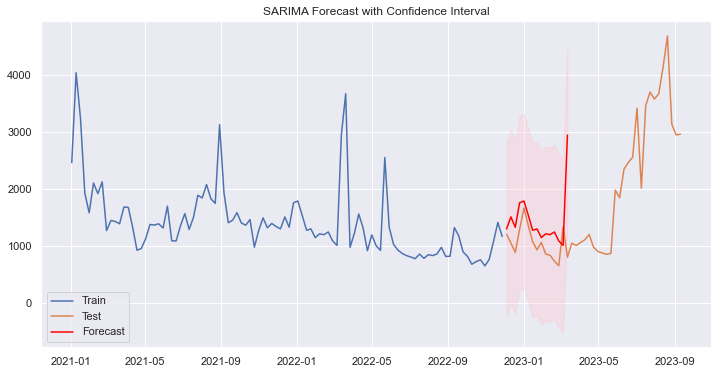

In [357]:
n_periods = 15  # forecast for 15 periods into the future

forecast_object = sarima_results.get_forecast(steps=n_periods)
forecast_values = forecast_object.predicted_mean

confidence_interval = forecast_object.conf_int()
lower_bound = confidence_interval.iloc[:, 0]
upper_bound = confidence_interval.iloc[:, 1]

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index,train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color='pink', alpha=0.3)
plt.legend(loc='best')
plt.title('SARIMA Forecast with Confidence Interval')
plt.show()


In [265]:
train_full = us_data.iloc[:]['downloads_fill_mean']

# Train the SARIMA model using the optimal parameters
sarima_model = SARIMAX(train_full,
                       order=best_param,
                       seasonal_order=best_seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09537D+00    |proj g|=  1.79747D-01

At iterate    5    f=  2.03924D+00    |proj g|=  8.57171D-05

At iterate   10    f=  2.03922D+00    |proj g|=  2.48498D-03

At iterate   15    f=  2.03714D+00    |proj g|=  2.59658D-02

At iterate   20    f=  2.02920D+00    |proj g|=  2.19744D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     24      1     0     0   9.859D-08   2.029D+00
  F =   2.0291968984960853     

CONVERG

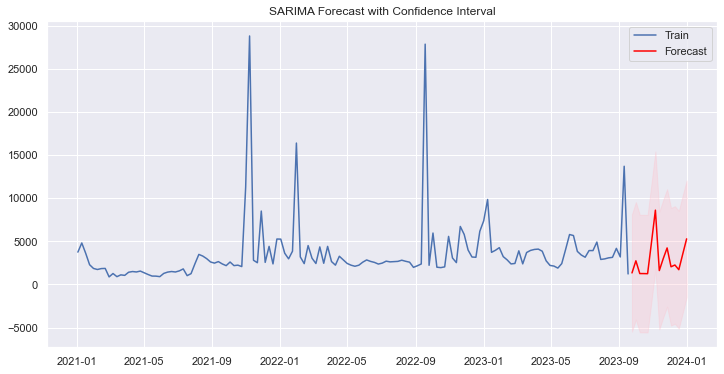

In [99]:
n_periods = 15  # forecast for 15 periods into the future

forecast_object = sarima_results.get_forecast(steps=n_periods)
forecast_values = forecast_object.predicted_mean

confidence_interval = forecast_object.conf_int()
lower_bound = confidence_interval.iloc[:, 0]
upper_bound = confidence_interval.iloc[:, 1]

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train_full.index,train_full, label='Train')
#plt.plot(test.index, test, label='Test')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color='pink', alpha=0.3)
plt.legend(loc='best')
plt.title('SARIMA Forecast with Confidence Interval')
plt.show()


In [100]:
forecast_values

2023-09-24    1344.674669
2023-10-01    2749.826949
2023-10-08    1269.086537
2023-10-15    1266.052747
2023-10-22    1253.536430
2023-10-29    4900.944971
2023-11-05    8636.344477
2023-11-12    1617.021254
2023-11-19    2993.303858
2023-11-26    4246.018584
2023-12-03    2057.408115
2023-12-10    2263.553633
2023-12-17    1719.823345
2023-12-24    3519.631926
2023-12-31    5303.252416
Freq: W-SUN, Name: predicted_mean, dtype: float64

# scale to all markets

In [127]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

def get_best_params(train):
    # Define the p, d, q and seasonal p, d, q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)
    seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

    # Grid search to find the optimal parameters
    best_aic = float('inf')
    best_param = None
    best_seasonal_param = None

    for param in itertools.product(p, d, q):
        for seasonal_param in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_param = param
                    best_seasonal_param = seasonal_param
            except:
                continue

    return best_param, best_seasonal_param


In [52]:
from tqdm import tqdm

## iOS forecast

In [266]:
best_seasonal_param = (0, 1, 1, 52)
best_param = (0, 0, 0)


In [267]:
df_organic_ios_weekly

,date,iOS Organic Downloads,downloads_fill_zero,downloads_fill_mean,Country
0,2021-01-03,2461,2461,2461,ROW
1,2021-01-10,4035,4035,4035,ROW
2,2021-01-17,3245,3245,3245,ROW
3,2021-01-24,1928,1928,1928,ROW
4,2021-01-31,1585,1585,1585,ROW
...,...,...,...,...,...
137,2023-08-20,4677,4677,4677,ROW
138,2023-08-27,3135,3135,3135,ROW
139,2023-09-03,2946,2946,2946,ROW
140,2023-09-10,2960,2960,2960,ROW


In [358]:
data_dict = {"market":[],
        "total_organic_ios_forecast":[],
        "total_to_date":[],
        "total_forecasted":[],
        "mape":[]}

for market in tqdm(df_organic_ios_weekly["Country"].unique()):
    print(market)

    df_market = df_organic_ios_weekly[df_organic_ios_weekly["Country"]==market]
    df_market = df_market.set_index("date")
    
    alpha_value = 0.50  # Adjust this value as needed
    df_market['downloads_ewma'] = df_market['downloads_fill_mean'].ewm(alpha=alpha_value).mean()


    # Split the data into training and test sets (80-20 split)
    # Train 70%
    train_end = df_market.iloc[round(len(df_market)*0.7)].name
    # Test 30%
    test_end = df_market.iloc[-2].name

    # Split the data into training and test sets (80-20 split)
    train = df_market[:train_end]['downloads_ewma']
    test = df_market[train_end + timedelta(days = 1):test_end]['downloads_ewma']

    
    # get params per market
    best_param, best_seasonal_param = get_best_params(train)
    
    # train and test
    sarima_model = SARIMAX(train,
                           order=best_param,
                           seasonal_order=best_seasonal_param,
                           enforce_stationarity=False,
                           enforce_invertibility=False)

    sarima_results = sarima_model.fit()

    # Predict on the test set
    start_date = test.index[0]
    end_date = test.index[-1]
    predictions = sarima_results.predict(start=start_date,
                                         end=end_date,
                                         dynamic=False)

    # Calculate MSPE for the predictions
    mape = calculate_mape(test, predictions)



    # train on full data
    train_full = df_market.iloc[:]['downloads_ewma']

    # Train the SARIMA model using the optimal parameters
    sarima_model = SARIMAX(train_full,
                           order=best_param,
                           seasonal_order=best_seasonal_param,
                           enforce_stationarity=False,
                           enforce_invertibility=False)

    sarima_results = sarima_model.fit()

    # forecast
    n_periods = 15  # forecast for 15 periods into the future
    forecast_object = sarima_results.get_forecast(steps=n_periods)

    forecast_values = forecast_object.predicted_mean


    actual_value = train_full[train_full.index.year == 2023].sum() #ytd
    forecast = forecast_values[forecast_values.index.year == 2023].sum() #forecast till EOY

    total_forecast_eoy = actual_value + forecast


    data_dict["market"].append(market)
    data_dict["total_organic_ios_forecast"].append(total_forecast_eoy)
    data_dict["mape"].append(mape)
    data_dict["total_to_date"].append(actual_value)
    data_dict["total_forecasted"].append(forecast)


    # sum all year data
    # sum forecasted data
    # append to dataframe


  0%|                                                           | 0/1 [00:00<?, ?it/s]/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs

ROW
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64513D+00    |proj g|=  1.08782D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   6.626D-06   8.645D+00
  F =   8.6450832336395020     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65399D+00    |proj g|=  3.05655D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   3.056D-05   3.654D+00
  F =   3.6539877064447239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.7

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24504D+00    |proj g|=  7.08632D-01

At iterate    5    f=  8.14584D+00    |proj g|=  2.59242D-03

At iterate   10    f=  8.14584D+00    |proj g|=  3.67088D-03

At iterate   15    f=  8.14539D+00    |proj g|=  4.30162D-02

At iterate   20    f=  8.12495D+00    |proj g|=  2.27580D-01

At iterate   25    f=  7.90242D+00    |proj g|=  1.18130D-01

At iterate   30    f=  7.89893D+00    |proj g|=  9.84618D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47311D+00    |proj g|=  1.27200D-01

At iterate    5    f=  3.46999D+00    |proj g|=  8.97181D-04

At iterate   10    f=  3.46985D+00    |proj g|=  1.99906D-02

At iterate   15    f=  3.46104D+00    |proj g|=  1.21032D-01

At iterate   20    f=  3.41841D+00    |proj g|=  1.49582D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     22     25      1     0     0   7.495D-06   3.418D+00
  F =   3.4182759975342556     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99015D+00    |proj g|=  3.84068D-01

At iterate    5    f=  3.92896D+00    |proj g|=  4.33802D-03

At iterate   10    f=  3.92810D+00    |proj g|=  1.44754D-02

At iterate   15    f=  3.88533D+00    |proj g|=  1.87963D-01

At iterate   20    f=  3.42419D+00    |proj g|=  2.03984D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     35      1     0     0   2.454D-07   3.424D+00
  F =   3.4240904596990109     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85650D+00    |proj g|=  3.33820D-01

At iterate    5    f=  3.76639D+00    |proj g|=  2.26566D-02

At iterate   10    f=  3.76506D+00    |proj g|=  5.45633D-04

At iterate   15    f=  3.76500D+00    |proj g|=  3.79513D-03

At iterate   20    f=  3.75854D+00    |proj g|=  4.79185D-02

At iterate   25    f=  3.35358D+00    |proj g|=  7.36940D-01

At iterate   30    f=  3.28578D+00    |proj g|=  5.59464D-03

At iterate   35    f=  3.28427D+00    |proj g|=  3.18786D-02

At iterate   40    f=  3.28411D+00    |proj g|=  7.29101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79115D+00    |proj g|=  5.14931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      6      1     0     0   4.505D-07   6.786D+00
  F =   6.7859032066588618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.2

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41279D+00    |proj g|=  1.36380D-03

At iterate    5    f=  3.36385D+00    |proj g|=  1.99090D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      8      1     0     0   1.991D-06   3.364D+00
  F =   3.3638468267076105     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31281D+00    |proj g|=  2.13807D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.138D-06   3.313D+00
  F =   3.3128110825936465     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24931D+00    |proj g|=  1.33012D-02

At iterate    5    f=  3.24731D+00    |proj g|=  5.42003D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     19      1     0     0   1.370D-06   3.247D+00
  F =   3.2472448855368539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70410D+00    |proj g|=  8.13242D-02

At iterate    5    f=  6.69779D+00    |proj g|=  4.58629D-04

At iterate   10    f=  6.69756D+00    |proj g|=  1.51654D-02

At iterate   15    f=  6.69516D+00    |proj g|=  3.64765D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   8.923D-06   6.695D+00
  F =   6.6951402874298580     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29009D+00    |proj g|=  4.12750D-02

At iterate    5    f=  3.28151D+00    |proj g|=  5.69547D-05

At iterate   10    f=  3.28150D+00    |proj g|=  1.80241D-03

At iterate   15    f=  3.28148D+00    |proj g|=  2.92544D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     20      1     0     0   2.925D-06   3.281D+00
  F =   3.2814802784703314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32617D+00    |proj g|=  2.85249D-02

At iterate    5    f=  3.32404D+00    |proj g|=  2.35243D-03

At iterate   10    f=  3.32072D+00    |proj g|=  4.69280D-02

At iterate   15    f=  3.30628D+00    |proj g|=  5.09659D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   3.275D-07   3.306D+00
  F =   3.3062132546177065     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19736D+00    |proj g|=  2.99685D-02

At iterate    5    f=  3.19183D+00    |proj g|=  8.18961D-02

At iterate   10    f=  3.17337D+00    |proj g|=  8.46618D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     22      1     0     0   9.900D-06   3.173D+00
  F =   3.1733696044627608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-pack

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92365D+00    |proj g|=  1.63666D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   1.637D-04   6.924D+00
  F =   6.9236512530674723     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.3

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.004D-05   3.458D+00
  F =   3.4581980558483978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42359D+00    |proj g|=  3.33156D-01

At iterate    5    f=  3.30828D+00    |proj g|=  4.47314D-02

At iterate   10    f=  3.30800D+00    |proj g|=  1.59376D-04

At iterate   15    f=  3.30797D+00    |proj g|=  5.00142D-03

At iterate   20    f=  3.30733D+00    |proj g|=  1.43251D-02

At iterate   25    f=  3.30712D+00    |proj g|=  2.16014D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     32      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.



At iterate    5    f=  3.30802D+00    |proj g|=  1.79376D-02

At iterate   10    f=  3.30800D+00    |proj g|=  8.24056D-04

At iterate   15    f=  3.30785D+00    |proj g|=  4.93782D-02

At iterate   20    f=  3.30712D+00    |proj g|=  1.02513D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     29      1     0     0   1.249D-05   3.307D+00
  F =   3.3071159713838325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74129D+00    |proj g|=  5.97417D-02

At iterate    5    f=  6.73751D+00    |proj g|=  1.62184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.622D-04   6.738D+00
  F =   6.7375091801786722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31341D+00    |proj g|=  6.36662D-02

At iterate    5    f=  3.30259D+00    |proj g|=  4.82870D-04

At iterate   10    f=  3.30258D+00    |proj g|=  1.13831D-03

At iterate   15    f=  3.30206D+00    |proj g|=  6.83167D-03

At iterate   20    f=  3.30182D+00    |proj g|=  1.62932D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   1.629D-06   3.302D+00
  F =   3.3018157089856852     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45551D+00    |proj g|=  4.13140D-01

At iterate    5    f=  3.31841D+00    |proj g|=  6.08499D-02

At iterate   10    f=  3.31350D+00    |proj g|=  1.51664D-02

At iterate   15    f=  3.31341D+00    |proj g|=  1.10407D-02

At iterate   20    f=  3.30608D+00    |proj g|=  8.84445D-02

At iterate   25    f=  3.29953D+00    |proj g|=  3.71331D-03

At iterate   30    f=  3.29949D+00    |proj g|=  7.81064D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25265D+00    |proj g|=  3.13217D-02

At iterate    5    f=  3.24924D+00    |proj g|=  2.34929D-03

At iterate   10    f=  3.24824D+00    |proj g|=  7.64401D-02

At iterate   15    f=  3.23444D+00    |proj g|=  9.30609D-02

At iterate   20    f=  3.23365D+00    |proj g|=  2.18898D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   2.203D-06   3.234D+00
  F =   3.2336507841047055     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77965D+00    |proj g|=  5.88400D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.884D-06   6.780D+00
  F =   6.7796517948157566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.2

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36220D+00    |proj g|=  2.79550D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.795D-06   3.362D+00
  F =   3.3621972051249180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25524D+00    |proj g|=  1.10567D-02

At iterate    5    f=  3.25510D+00    |proj g|=  4.33030D-03

At iterate   10    f=  3.25128D+00    |proj g|=  3.80014D-02

At iterate   15    f=  3.24558D+00    |proj g|=  1.04818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   7.128D-06   3.246D+00
  F =   3.2455746520333837     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25573D+00    |proj g|=  1.87924D-02

At iterate    5    f=  3.25493D+00    |proj g|=  3.87087D-02

At iterate   10    f=  3.24578D+00    |proj g|=  7.51155D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   6.658D-07   3.246D+00
  F =   3.2455746518336595     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70280D+00    |proj g|=  9.92791D-02

At iterate    5    f=  6.68950D+00    |proj g|=  9.82325D-03

At iterate   10    f=  6.68936D+00    |proj g|=  6.83908D-04

At iterate   15    f=  6.68906D+00    |proj g|=  1.75422D-02

At iterate   20    f=  6.68714D+00    |proj g|=  5.55555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   4.386D-06   6.687D+00
  F =   6.6871095207657980     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28665D+00    |proj g|=  6.41265D-02

At iterate    5    f=  3.25379D+00    |proj g|=  6.44551D-02

At iterate   10    f=  3.24681D+00    |proj g|=  5.80966D-04

At iterate   15    f=  3.24678D+00    |proj g|=  4.79879D-03

At iterate   20    f=  3.24500D+00    |proj g|=  3.21484D-02

At iterate   25    f=  3.24360D+00    |proj g|=  6.87350D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     35      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25983D+00    |proj g|=  4.87210D-02

At iterate    5    f=  3.23220D+00    |proj g|=  3.65643D-02

At iterate   10    f=  3.22358D+00    |proj g|=  3.88890D-02

At iterate   15    f=  3.22171D+00    |proj g|=  6.95450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     28      1     0     0   6.951D-05   3.222D+00
  F =   3.2217097097177088     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19441D+00    |proj g|=  4.77481D-02

At iterate    5    f=  3.16707D+00    |proj g|=  2.76810D-02

At iterate   10    f=  3.15635D+00    |proj g|=  3.56750D-02

At iterate   15    f=  3.15312D+00    |proj g|=  2.21333D-04

At iterate   20    f=  3.15312D+00    |proj g|=  1.54918D-04

At iterate   25    f=  3.15312D+00    |proj g|=  2.57059D-03

At iterate   30    f=  3.15283D+00    |proj g|=  1.83585D-02

At iterate   35    f=  3.15217D+00    |proj g|=  5.17191D-03

At iterate   40    f=  3.15214D+00    |proj g|=  1.77379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30644D+00    |proj g|=  1.65409D-01

At iterate    5    f=  2.25550D+00    |proj g|=  3.56710D-05

At iterate   10    f=  2.25549D+00    |proj g|=  8.17596D-04

At iterate   15    f=  2.25510D+00    |proj g|=  9.67928D-03

At iterate   20    f=  2.25204D+00    |proj g|=  1.97048D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     22     23      1     0     0   5.855D-06   2.252D+00
  F =   2.2520418790900187     

CONVERG

100%|███████████████████████████████████████████████████| 1/1 [01:36<00:00, 96.44s/it]


In [359]:
df_organic_ios_forecast = pd.DataFrame(data_dict)

In [360]:
df_organic_ios_forecast

,market,total_organic_ios_forecast,total_to_date,total_forecasted,mape
0,ROW,86331.208289,70688.733242,15642.475047,0.504664


## Android forecast


In [361]:
df_organic_android_weekly

,date,Android Organic Downloads,downloads_fill_zero,downloads_fill_mean,Country
0,2021-01-03,11029,11029,11029.0,ROW
1,2021-01-10,14273,14273,14273.0,ROW
2,2021-01-17,11261,11261,11261.0,ROW
3,2021-01-24,9528,9528,9528.0,ROW
4,2021-01-31,10346,10346,10346.0,ROW
...,...,...,...,...,...
137,2023-08-20,15663,15663,15663.0,ROW
138,2023-08-27,5654,5654,5654.0,ROW
139,2023-09-03,5274,5274,5274.0,ROW
140,2023-09-10,5081,5081,5081.0,ROW


In [362]:
best_seasonal_param = (0, 1, 1, 52)
best_param = (0, 0, 0)

data_dict = {"market":[],
        "total_organic_android_forecast":[],
        "total_to_date":[],
        "total_forecasted":[],
        "mape":[]}

for market in tqdm(df_organic_android_weekly["Country"].unique()):
    print(market)

    df_market = df_organic_android_weekly[df_organic_android_weekly["Country"]==market]
    df_market = df_market.set_index("date")
    
    alpha_value = 0.50  # Adjust this value as needed
    df_market['downloads_ewma'] = df_market['downloads_fill_mean'].ewm(alpha=alpha_value).mean()


    # Split the data into training and test sets (80-20 split)
    # Train 70%
    train_end = df_market.iloc[round(len(df_market)*0.7)].name
    # Test 30%
    test_end = df_market.iloc[-2].name

    # Split the data into training and test sets (80-20 split)
    train = df_market[:train_end]['downloads_ewma']
    test = df_market[train_end + timedelta(days = 1):test_end]['downloads_ewma']

        
    # get params per market
    best_param, best_seasonal_param = get_best_params(train)

    # train and test
    sarima_model = SARIMAX(train,
                           order=best_param,
                           seasonal_order=best_seasonal_param,
                           enforce_stationarity=False,
                           enforce_invertibility=False)

    sarima_results = sarima_model.fit()

    # Predict on the test set
    start_date = test.index[0]
    end_date = test.index[-1]
    predictions = sarima_results.predict(start=start_date,
                                         end=end_date,
                                         dynamic=False)

    # Calculate MSPE for the predictions
    mape = calculate_mape(test, predictions)



    # train on full data
    train_full = df_market.iloc[:]['downloads_ewma']

    # Train the SARIMA model using the optimal parameters
    sarima_model = SARIMAX(train_full,
                           order=best_param,
                           seasonal_order=best_seasonal_param,
                           enforce_stationarity=False,
                           enforce_invertibility=False)

    sarima_results = sarima_model.fit()

    # forecast
    n_periods = 15  # forecast for 15 periods into the future
    forecast_object = sarima_results.get_forecast(steps=n_periods)

    forecast_values = forecast_object.predicted_mean


    actual_value = train_full[train_full.index.year == 2023].sum() #ytd
    forecast = forecast_values[forecast_values.index.year == 2023].sum() #forecast till EOY

    total_forecast_eoy = actual_value + forecast


    data_dict["market"].append(market)
    data_dict["total_organic_android_forecast"].append(total_forecast_eoy)
    data_dict["mape"].append(mape)
    data_dict["total_to_date"].append(actual_value)
    data_dict["total_forecasted"].append(forecast)


    # sum all year data
    # sum forecasted data
    # append to dataframe


  0%|                                                           | 0/1 [00:00<?, ?it/s]/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs

ROW
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05723D+01    |proj g|=  9.52127D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.521D-08   1.057D+01
  F =   10.572311218430936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50584D+00    |proj g|=  2.63408D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      8      1     0     0   9.771D-06   4.419D+00
  F =   4.4189145931293297     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32663D+00    |proj g|=  5.34196D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   5.333D-05   4.327D+00
  F =   4.3266347587301155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43090D+01    |proj g|=  1.63645D+01

At iterate    5    f=  4.24041D+00    |proj g|=  2.89011D-02

At iterate   10    f=  4.23704D+00    |proj g|=  3.18955D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     24      1     0     0   1.876D-05   4.237D+00
  F =   4.2369806526873592     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07656D+01    |proj g|=  7.49126D-01

At iterate    5    f=  1.01067D+01    |proj g|=  4.01807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     12      1     0     0   6.700D-05   1.011D+01
  F =   10.106650891089449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30099D+00    |proj g|=  2.60124D-01

At iterate    5    f=  4.16112D+00    |proj g|=  2.73478D-03

At iterate   10    f=  4.16112D+00    |proj g|=  5.62829D-04

At iterate   15    f=  4.16108D+00    |proj g|=  8.55861D-03

At iterate   20    f=  4.15572D+00    |proj g|=  1.20182D-01

At iterate   25    f=  4.08393D+00    |proj g|=  2.94822D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     25     29      1     0     0   

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09019D+00    |proj g|=  3.07937D-01

At iterate    5    f=  4.88551D+00    |proj g|=  5.17552D-04

At iterate   10    f=  4.88551D+00    |proj g|=  2.15361D-04

At iterate   15    f=  4.88548D+00    |proj g|=  3.10430D-03

At iterate   20    f=  4.88047D+00    |proj g|=  4.16787D-02

At iterate   25    f=  4.76467D+00    |proj g|=  3.99123D-01

At iterate   30    f=  4.21720D+00    |proj g|=  3.79383D-01

At iterate   35    f=  4.14689D+00    |proj g|=  9.45976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92073D+00    |proj g|=  2.63112D-01

At iterate    5    f=  4.68145D+00    |proj g|=  4.96462D-03

At iterate   10    f=  4.68048D+00    |proj g|=  1.31291D-03

At iterate   15    f=  4.68046D+00    |proj g|=  4.36107D-05

At iterate   20    f=  4.68044D+00    |proj g|=  6.68456D-04

At iterate   25    f=  4.67928D+00    |proj g|=  9.78310D-03

At iterate   30    f=  4.62948D+00    |proj g|=  2.01333D-01

At iterate   35    f=  4.37859D+00    |proj g|=  1.90263D-01

At iterate   40    f=  3.94978D+00    |proj g|=  5.43906D-02

At iterate   45    f=  3.91677D+00    |proj g|=  7.77175D-02


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  3.91447D+00    |proj g|=  2.63609D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     67      1     0     0   2.636D-04   3.914D+00
  F =   3.9144739624620786     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71651D+00    |proj g|=  1.29365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   1.506D-06   7.715D+00
  F =   7.7145043380613370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85020D+00    |proj g|=  7.70068D-04

At iterate    5    f=  3.77504D+00    |proj g|=  4.64309D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      8      1     0     0   4.643D-06   3.775D+00
  F =   3.7750382840479362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74020D+00    |proj g|=  1.66680D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   1.667D-06   3.740D+00
  F =   3.7402027895742047     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56683D+00    |proj g|=  1.44488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   1.512D-05   7.567D+00
  F =   7.5667440809624464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.5

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64772D+00    |proj g|=  1.78481D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   6.281D-07   3.647D+00
  F =   3.6474690105058603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72447D+00    |proj g|=  3.18703D-02

At iterate    5    f=  3.72383D+00    |proj g|=  3.07913D-04

At iterate   10    f=  3.72362D+00    |proj g|=  9.62625D-03

At iterate   15    f=  3.71881D+00    |proj g|=  2.55269D-02

At iterate   20    f=  3.71750D+00    |proj g|=  1.80641D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     25      1     0     0   1.023D-06   3.717D+00
  F =   3.7174976891404965     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.



At iterate    5    f=  3.57323D+00    |proj g|=  5.10513D-02

At iterate   10    f=  3.56526D+00    |proj g|=  1.64647D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   1.645D-05   3.565D+00
  F =   3.5652558454095868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.84342D+00    |proj g|=  1.22528D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     16      1     0     0   1.225D-03   7.843D+00
  F =   7.8434185232155986     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.7

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86484D+00    |proj g|=  2.38720D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   2.377D-05   3.865D+00
  F =   3.8648363461474617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01042D+00    |proj g|=  5.03162D-01

At iterate    5    f=  3.87668D+00    |proj g|=  6.97905D-01

At iterate   10    f=  3.74059D+00    |proj g|=  2.27097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     27      1     0     0   5.076D-05   3.741D+00
  F =   3.7405912482234713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74061D+00    |proj g|=  5.06151D-02

At iterate    5    f=  3.74060D+00    |proj g|=  1.71590D-02

At iterate   10    f=  3.74059D+00    |proj g|=  5.07698D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   5.077D-05   3.741D+00
  F =   3.7405914187237372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66092D+00    |proj g|=  3.18420D-01

At iterate    5    f=  7.66022D+00    |proj g|=  2.19743D-01

At iterate   10    f=  7.65987D+00    |proj g|=  6.92626D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   6.926D-05   7.660D+00
  F =   7.6598684669841406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73274D+00    |proj g|=  3.94692D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   4.606D-05   3.732D+00
  F =   3.7318328321707588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97133D+00    |proj g|=  5.64267D-01

At iterate    5    f=  3.85088D+00    |proj g|=  3.50494D-01

At iterate   10    f=  3.72873D+00    |proj g|=  4.40840D-02

At iterate   15    f=  3.72721D+00    |proj g|=  2.24439D-04

At iterate   20    f=  3.72718D+00    |proj g|=  4.11437D-02

At iterate   25    f=  3.72615D+00    |proj g|=  2.53869D-01

At iterate   30    f=  3.72020D+00    |proj g|=  1.11446D-01

At iterate   35    f=  3.71944D+00    |proj g|=  2.81370D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.



At iterate    5    f=  3.65015D+00    |proj g|=  3.64681D-02

At iterate   10    f=  3.64694D+00    |proj g|=  6.69346D-02

At iterate   15    f=  3.63910D+00    |proj g|=  1.65656D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     26      1     0     0   1.748D-05   3.639D+00
  F =   3.6390262136604319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68039D+00    |proj g|=  5.83693D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.837D-06   7.680D+00
  F =   7.6803850947934116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.6

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74965D+00    |proj g|=  2.68070D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.681D-06   3.750D+00
  F =   3.7496484949464564     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64554D+00    |proj g|=  2.27424D-02

At iterate    5    f=  3.64506D+00    |proj g|=  3.02306D-03

At iterate   10    f=  3.64253D+00    |proj g|=  1.61069D-02

At iterate   15    f=  3.64198D+00    |proj g|=  4.20423D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     22      1     0     0   3.306D-06   3.642D+00
  F =   3.6419766818496861     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64556D+00    |proj g|=  2.33243D-02

At iterate    5    f=  3.64336D+00    |proj g|=  2.54067D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     21      1     0     0   9.188D-06   3.642D+00
  F =   3.6419766820261525     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56409D+00    |proj g|=  4.28835D-02

At iterate    5    f=  7.56315D+00    |proj g|=  1.14300D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   1.143D-05   7.563D+00
  F =   7.5631475702848867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64706D+00    |proj g|=  3.91683D-02

At iterate    5    f=  3.64536D+00    |proj g|=  4.06963D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   4.070D-06   3.645D+00
  F =   3.6453643029155143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64968D+00    |proj g|=  1.76199D-02

At iterate    5    f=  3.64942D+00    |proj g|=  5.28987D-04

At iterate   10    f=  3.64936D+00    |proj g|=  3.66297D-03

At iterate   15    f=  3.64717D+00    |proj g|=  5.16638D-02

At iterate   20    f=  3.64183D+00    |proj g|=  7.17333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   2.946D-06   3.642D+00
  F =   3.6418263709106089     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57671D+00    |proj g|=  1.67944D-02

At iterate    5    f=  3.57359D+00    |proj g|=  4.58991D-02

At iterate   10    f=  3.56597D+00    |proj g|=  9.59008D-03

At iterate   15    f=  3.56521D+00    |proj g|=  1.67783D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     25      1     0     0   1.678D-05   3.565D+00
  F =   3.5652089261139186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58071D+00    |proj g|=  7.50335D-02


 This problem is unconstrained.



At iterate    5    f=  2.54839D+00    |proj g|=  2.60813D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     11      1     0     0   2.608D-05   2.548D+00
  F =   2.5483863438082768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


100%|███████████████████████████████████████████████████| 1/1 [01:15<00:00, 75.97s/it]


In [363]:
df_organic_android_forecast = pd.DataFrame(data_dict)

In [364]:
df_total = df_organic_ios_forecast.merge(df_organic_android_forecast, on="market")

df_total["total_organic"] = df_total["total_organic_ios_forecast"] + df_total["total_organic_android_forecast"]
df_total["market_name"] = df_total["market"].map(country_dict)
df_total["total_to_date"] = df_total["total_to_date_x"] + df_total["total_to_date_y"]
#df_total["total_forecasted"] = df_total["total_forecasted_x"] + df_total["total_forecasted_y"]


df_total = df_total[['market', 'market_name', 'total_to_date', 'total_to_date_x', 'total_to_date_y', 'total_forecasted_x', 'total_forecasted_y', 'total_organic', 'total_organic_ios_forecast', 'mape_x',
       'total_organic_android_forecast', 'mape_y',]]


df_total = df_total.rename(columns={"mape_y": "android_error_%", "mape_x": "ios_error_%",}).round(2)

In [365]:
df_total.to_csv("LEGO_organic_forecasts_2023_SARIMA_model_3_ROW.csv")

In [366]:
df_total

,market,market_name,total_to_date,total_to_date_x,total_to_date_y,total_forecasted_x,total_forecasted_y,total_organic,total_organic_ios_forecast,ios_error_%,total_organic_android_forecast,android_error_%
0,ROW,NaN,445495.43,70688.73,374806.7,15642.48,145386.48,606524.38,86331.21,0.5,520193.18,0.36


In [280]:


df_total["total_to_date_x"] + df_total["total_forecasted_x"]

0    82472.55
dtype: float64

In [185]:
# how much does the new forecast account for?

df_total["forecast_total"] = df_total["total_organic_ios_forecast"] + df_total["total_organic_android_forecast"]

In [215]:
df_total.mean()

/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_43125/23099594.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_total.mean()


total_to_date                     41720.986774
total_forecasted_x                 4967.096452
total_forecasted_y                10288.427742
total_organic                     56976.510968
total_organic_ios_forecast        16874.842258
ios_error_%                           0.390968
total_organic_android_forecast    40101.667742
android_error_%                       0.241613
dtype: float64

## Low volumn countries

In [138]:
df_organic_android_forecast.sort_values(by="total_to_date")

,market,total_organic_android_forecast,total_to_date,total_forecasted,mape
27,SK,6849.893989,4573.5,2276.393989,0.530416
15,HK,6803.831696,4642.5,2161.331696,0.430682
22,NZ,8089.968346,5862.5,2227.468346,0.602663
0,AT,8542.552711,6261.0,2281.552711,0.301545
14,GR,9226.357724,6506.0,2720.357724,0.403792
10,DK,8558.208288,6615.5,1942.708288,0.357124
5,CH,10587.982620,7828.0,2759.982620,0.538850
29,TW,11675.112278,8185.5,3489.612278,0.361438
26,SE,12209.154060,8826.0,3383.154060,0.269054
16,HU,13552.037876,9421.0,4131.037876,0.436153


## Low volume markets - Android



## Low volume markets - Ios


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05732D+00    |proj g|=  6.18650D-02

At iterate    5    f=  1.04777D+00    |proj g|=  5.25682D-02

At iterate   10    f=  9.85842D-01    |proj g|=  1.70771D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   2.478D-06   9.843D-01
  F =  0.98429416292963612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26934D+00    |proj g|=  1.83702D-01

At iterate    5    f=  1.23994D+00    |proj g|=  2.01665D-02

At iterate   10    f=  1.15898D+00    |proj g|=  5.05546D-01

At iterate   15    f=  1.11715D+00    |proj g|=  1.40741D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     21      1     0     0   6.296D-06   1.117D+00
  F =   1.1171461371394213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.48135D-01    |proj g|=  5.87980D-02

At iterate    5    f=  9.37147D-01    |proj g|=  6.43477D-02

At iterate   10    f=  9.13735D-01    |proj g|=  1.16037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     13      1     0     0   4.287D-06   9.137D-01
  F =  0.91373472141843737     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37934D+00    |proj g|=  1.83706D-01

At iterate    5    f=  1.33267D+00    |proj g|=  2.19450D-03

At iterate   10    f=  1.32821D+00    |proj g|=  4.24816D-02

At iterate   15    f=  1.31295D+00    |proj g|=  2.84871D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     19      1     0     0   7.420D-06   1.313D+00
  F =   1.3127785702408532     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


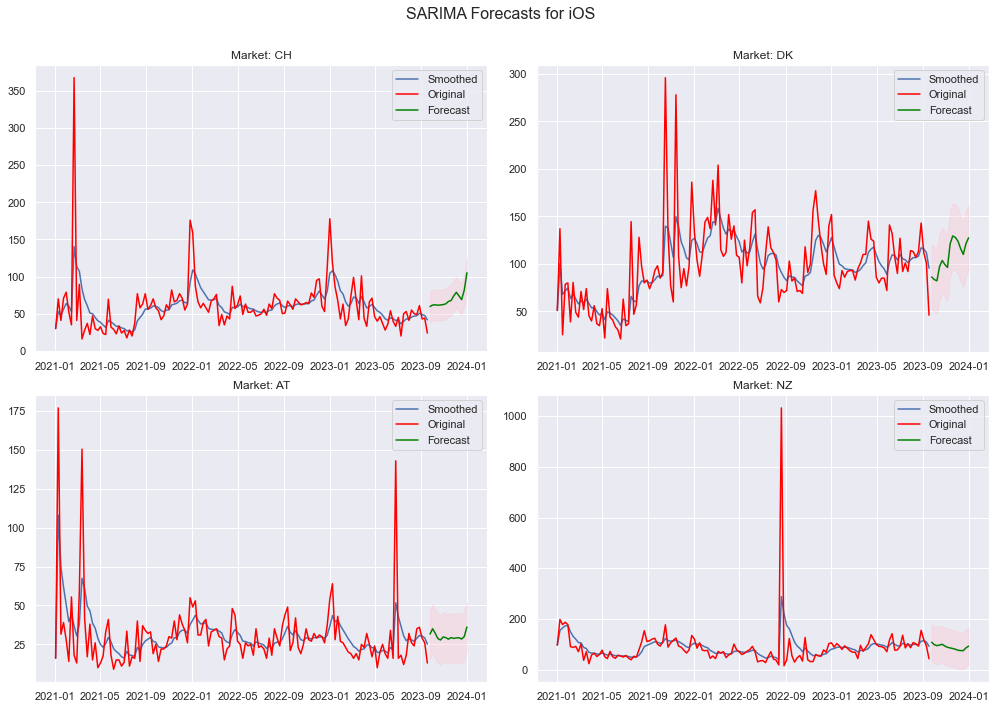

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  1.56523D+00    |proj g|=  9.03268D-02

At iterate    5    f=  1.48047D+00    |proj g|=  1.15388D-04

At iterate   10    f=  1.48041D+00    |proj g|=  3.87465D-03

At iterate   15    f=  1.47991D+00    |proj g|=  1.34835D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     18      1     0     0   1.097D-06   1.480D+00
  F =   1.4799140750237505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51338D+00    |proj g|=  6.71883D-02

At iterate    5    f=  1.30940D+00    |proj g|=  1.95656D-02

At iterate   10    f=  1.30752D+00    |proj g|=  4.56438D-04

At iterate   15    f=  1.30731D+00    |proj g|=  4.61363D-03

At iterate   20    f=  1.30699D+00    |proj g|=  2.07726D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     27      1     0     0   8.540D-06   1.307D+00
  F =   1.3069905543783420     

CONVERG

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71671D+00    |proj g|=  1.12588D-01

At iterate    5    f=  1.69721D+00    |proj g|=  3.50555D-03

At iterate   10    f=  1.68949D+00    |proj g|=  1.53594D-02

At iterate   15    f=  1.68638D+00    |proj g|=  8.12434D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     23      1     0     0   1.475D-06   1.686D+00
  F =   1.6863830383452438     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


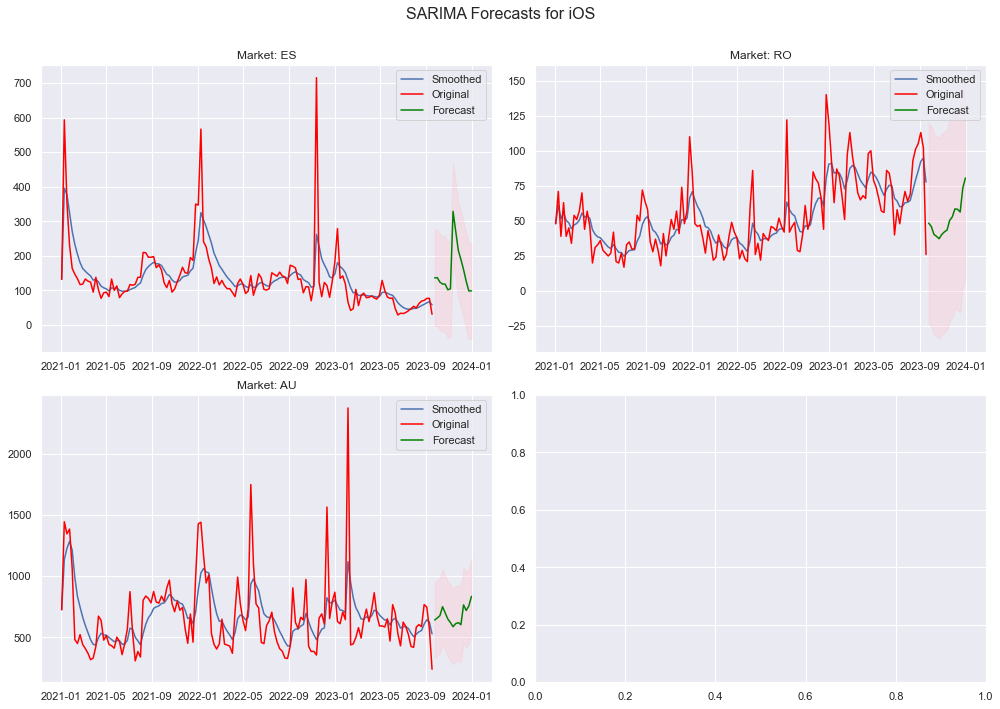

In [175]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

markets = ["CH",
"DK",
"AT",
"NZ",
"ES",
"RO",
"AU"]

# Use a chunk size of 4
for i in range(0, len(markets), 4):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('SARIMA Forecasts for iOS', fontsize=16)

    # Adjust the range to pick up to 4 markets for this iteration
    for j, market in enumerate(markets[i:i+4]):
        ax = axes[j // 2, j % 2]
        
        df_low_market = df_organic_ios_weekly[df_organic_ios_weekly["Country"]==market]
        df_low_market = df_low_market.set_index("date")
        
        alpha_value = 0.25  # Adjust this value as needed
        df_low_market['downloads_ewma'] = df_low_market['downloads_fill_mean'].ewm(alpha=alpha_value).mean()


        # Train data
        train_full = df_low_market['downloads_ewma']

        # Train the SARIMA model using the optimal parameters
        sarima_model = SARIMAX(train_full,
                               order=best_param,
                               seasonal_order=best_seasonal_param,
                               enforce_stationarity=False,
                               enforce_invertibility=False)

        sarima_results = sarima_model.fit()

        # Forecast
        n_periods = 15  
        forecast_object = sarima_results.get_forecast(steps=n_periods)
        forecast_values = forecast_object.predicted_mean
        confidence_interval = forecast_object.conf_int()
        lower_bound = confidence_interval.iloc[:, 0]
        upper_bound = confidence_interval.iloc[:, 1]

        ax.plot(train_full.index, train_full, label='Smoothed')
        ax.plot(df_low_market['downloads_fill_mean'].index, df_low_market['downloads_fill_mean'], color='red', label='Original')
        ax.plot(forecast_values.index, forecast_values, color='green', label='Forecast')
        ax.fill_between(lower_bound.index, lower_bound, upper_bound, color='pink', alpha=0.3)
        ax.legend(loc='best')
        ax.set_title(f'Market: {market}')

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61799D+00    |proj g|=  2.17487D-01


 This problem is unconstrained.



At iterate    5    f=  1.53413D+00    |proj g|=  9.83195D-04

At iterate   10    f=  1.53022D+00    |proj g|=  7.28724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   2.786D-06   1.530D+00
  F =   1.5299596723068527     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52323D+00    |proj g|=  2.03724D-01


 This problem is unconstrained.



At iterate    5    f=  1.43423D+00    |proj g|=  3.30065D-04

At iterate   10    f=  1.43398D+00    |proj g|=  7.54898D-03

At iterate   15    f=  1.43354D+00    |proj g|=  3.79390D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     16      1     0     0   3.794D-06   1.434D+00
  F =   1.4335425690026256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28124D+00    |proj g|=  3.18196D-03


 This problem is unconstrained.



At iterate    5    f=  1.26748D+00    |proj g|=  1.28056D-01

At iterate   10    f=  1.25267D+00    |proj g|=  4.27705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   6.789D-07   1.253D+00
  F =   1.2526675163541177     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46214D+00    |proj g|=  2.25388D-01

At iterate    5    f=  1.39612D+00    |proj g|=  1.63531D-03

At iterate   10    f=  1.39332D+00    |proj g|=  3.48514D-02

At iterate   15    f=  1.37817D+00    |proj g|=  2.68460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     19      1     0     0   1.333D-06   1.378D+00
  F =   1.3781146849453823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


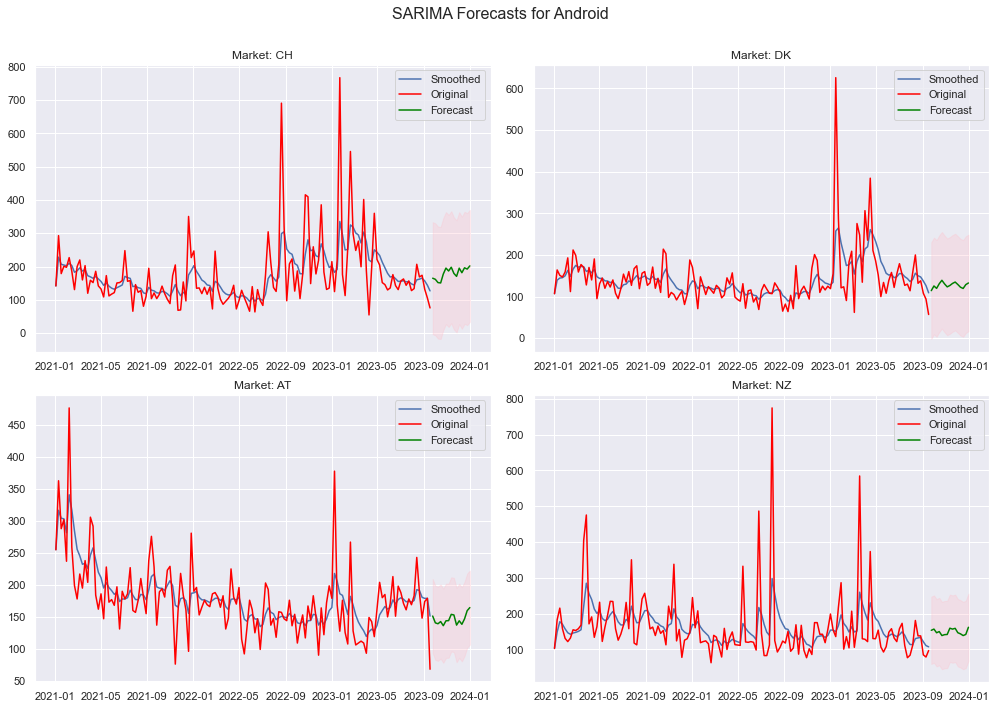

/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77350D+00    |proj g|=  7.55653D-03

At iterate    5    f=  1.76188D+00    |proj g|=  2.06379D-02

At iterate   10    f=  1.75913D+00    |proj g|=  5.20140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     17      1     0     0   5.495D-06   1.759D+00
  F =   1.7591256838936780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74994D+00    |proj g|=  1.71378D-01


 This problem is unconstrained.



At iterate    5    f=  1.69855D+00    |proj g|=  1.47818D-03

At iterate   10    f=  1.69495D+00    |proj g|=  1.41516D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     18      1     0     0   8.881D-06   1.694D+00
  F =   1.6938510623606589     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
/Users/moe/.pyenv/versions/3.8.13/envs/phiture/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68668D+00    |proj g|=  1.22739D-01


 This problem is unconstrained.



At iterate    5    f=  1.67520D+00    |proj g|=  7.57816D-04

At iterate   10    f=  1.67459D+00    |proj g|=  2.31194D-02

At iterate   15    f=  1.65161D+00    |proj g|=  8.85379D-02

At iterate   20    f=  1.64668D+00    |proj g|=  2.86415D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     23      1     0     0   2.864D-06   1.647D+00
  F =   1.6466801055056526     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


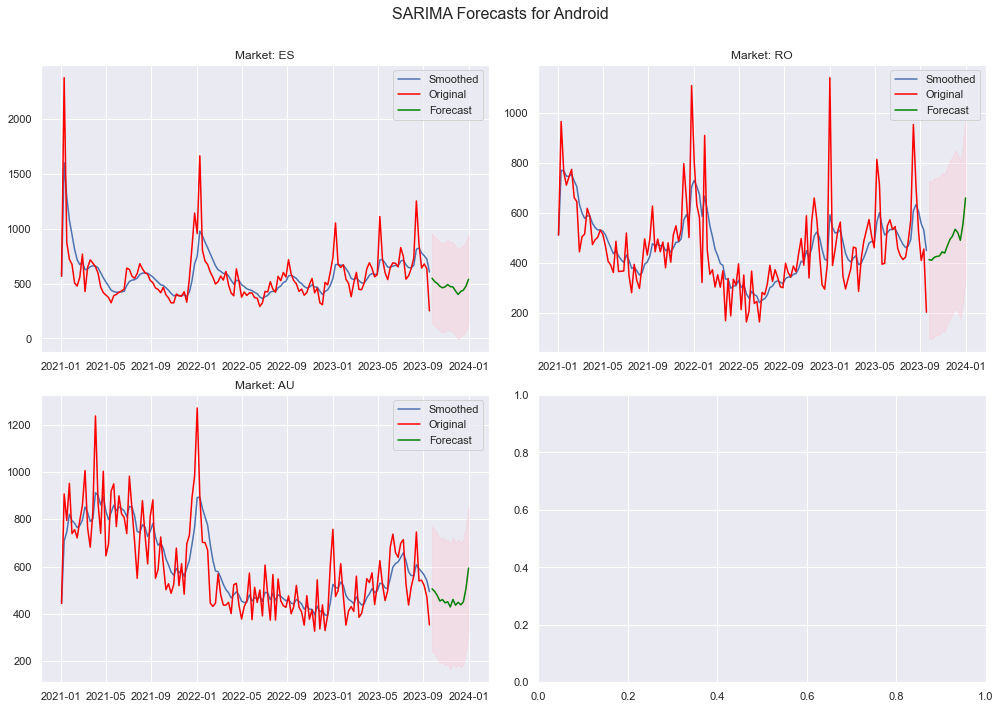

In [174]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

markets = ["CH",
"DK",
"AT",
"NZ",
"ES",
"RO",
"AU"]

# Use a chunk size of 4
for i in range(0, len(markets), 4):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('SARIMA Forecasts for Android', fontsize=16)

    # Adjust the range to pick up to 4 markets for this iteration
    for j, market in enumerate(markets[i:i+4]):
        ax = axes[j // 2, j % 2]
        
        df_low_market = df_organic_android_weekly[df_organic_android_weekly["Country"]==market]
        df_low_market = df_low_market.set_index("date")
        
        alpha_value = 0.25  # Adjust this value as needed
        df_low_market['downloads_ewma'] = df_low_market['downloads_fill_mean'].ewm(alpha=alpha_value).mean()


        # Train data
        train_full = df_low_market['downloads_ewma']

        # Train the SARIMA model using the optimal parameters
        sarima_model = SARIMAX(train_full,
                               order=best_param,
                               seasonal_order=best_seasonal_param,
                               enforce_stationarity=False,
                               enforce_invertibility=False)

        sarima_results = sarima_model.fit()

        # Forecast
        n_periods = 15  
        forecast_object = sarima_results.get_forecast(steps=n_periods)
        forecast_values = forecast_object.predicted_mean
        confidence_interval = forecast_object.conf_int()
        lower_bound = confidence_interval.iloc[:, 0]
        upper_bound = confidence_interval.iloc[:, 1]

        ax.plot(train_full.index, train_full, label='Smoothed')
        ax.plot(df_low_market['downloads_fill_mean'].index, df_low_market['downloads_fill_mean'], color='red', label='Original')
        ax.plot(forecast_values.index, forecast_values, color='green', label='Forecast')
        ax.fill_between(lower_bound.index, lower_bound, upper_bound, color='pink', alpha=0.3)
        ax.legend(loc='best')
        ax.set_title(f'Market: {market}')

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()


In [159]:
alpha_value = 0.25  # Adjust this value as needed
df_low_market['downloads_ewma'] = df_low_market['downloads_fill_mean'].ewm(alpha=alpha_value).mean()

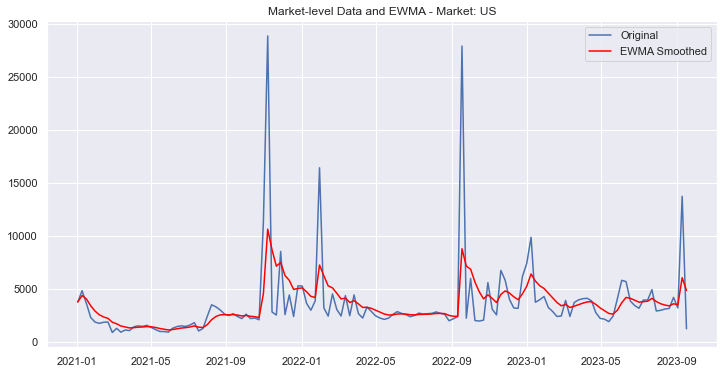

In [160]:
plt.figure(figsize=(12,6))
plt.plot(df_low_market.index, df_low_market['downloads_fill_mean'], label='Original')
plt.plot(df_low_market.index, df_low_market['downloads_ewma'], color='red', label='EWMA Smoothed')
plt.legend(loc='best')
plt.title(f'Market-level Data and EWMA - Market: {market}')
plt.show()
